# Globant Test - DS - Diabetes Problem

 Importing pandas, os, math and numpy as baseline libraries

In [630]:
import os
import numpy as np
import pandas as pd
import math

## Describing and cleaning

In [631]:
file_path = 'diabetic_data_initial.csv'

#### Reading File

In [632]:
diabetes_data = pd.read_csv(file_path)
diabetes_data.head()

,encounter_id,patient_nbr,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,...,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
0,2278392,8222157,Caucasian,Female,[0-10),?,6,25,1,1,...,No,No,No,No,No,No,No,No,No,NO
1,149190,55629189,Caucasian,Female,[10-20),?,1,1,7,3,...,No,Up,No,No,No,No,No,Ch,Yes,>30
2,64410,86047875,AfricanAmerican,Female,[20-30),?,1,1,7,2,...,No,No,No,No,No,No,No,No,Yes,NO
3,500364,82442376,Caucasian,Male,[30-40),?,1,1,7,2,...,No,Up,No,No,No,No,No,Ch,Yes,NO
4,16680,42519267,Caucasian,Male,[40-50),?,1,1,7,1,...,No,Steady,No,No,No,No,No,Ch,Yes,NO


In [633]:
diabetes_data.info()
# At first sight we can see that there are non-null columns in data unless Weight data where we can see '?' characters in columns.
# Also we can see that its dtype is object and we could expect it to be number.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101766 entries, 0 to 101765
Data columns (total 50 columns):
 #   Column                    Non-Null Count   Dtype 
---  ------                    --------------   ----- 
 0   encounter_id              101766 non-null  int64 
 1   patient_nbr               101766 non-null  int64 
 2   race                      101766 non-null  object
 3   gender                    101766 non-null  object
 4   age                       101766 non-null  object
 5   weight                    101766 non-null  object
 6   admission_type_id         101766 non-null  int64 
 7   discharge_disposition_id  101766 non-null  int64 
 8   admission_source_id       101766 non-null  int64 
 9   time_in_hospital          101766 non-null  int64 
 10  payer_code                101766 non-null  object
 11  medical_specialty         101766 non-null  object
 12  num_lab_procedures        101766 non-null  int64 
 13  num_procedures            101766 non-null  int64 
 14  num_

In [634]:
diabetes_data.describe()

,encounter_id,patient_nbr,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,number_diagnoses
count,1.017660e+05,1.017660e+05,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000
mean,1.652016e+08,5.433040e+07,2.024006,3.715642,5.754437,4.395987,43.095641,1.339730,16.021844,0.369357,0.197836,0.635566,7.422607
std,1.026403e+08,3.869636e+07,1.445403,5.280166,4.064081,2.985108,19.674362,1.705807,8.127566,1.267265,0.930472,1.262863,1.933600
min,1.252200e+04,1.350000e+02,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000
25%,8.496119e+07,2.341322e+07,1.000000,1.000000,1.000000,2.000000,31.000000,0.000000,10.000000,0.000000,0.000000,0.000000,6.000000
50%,1.523890e+08,4.550514e+07,1.000000,1.000000,7.000000,4.000000,44.000000,1.000000,15.000000,0.000000,0.000000,0.000000,8.000000
75%,2.302709e+08,8.754595e+07,3.000000,4.000000,7.000000,6.000000,57.000000,2.000000,20.000000,0.000000,0.000000,1.000000,9.000000
max,4.438672e+08,1.895026e+08,8.000000,28.000000,25.000000,14.000000,132.000000,6.000000,81.000000,42.000000,76.000000,21.000000,16.000000


It's needed to replace '?' to nan value.

In [635]:
diabetes_data['weight'].unique()

array(['?', '[75-100)', '[50-75)', '[0-25)', '[100-125)', '[25-50)',
       '[125-150)', '[175-200)', '[150-175)', '>200'], dtype=object)

In [636]:
diabetes_data.replace('?', np.NAN, inplace=True)
diabetes_data['weight'].unique()

array([nan, '[75-100)', '[50-75)', '[0-25)', '[100-125)', '[25-50)',
       '[125-150)', '[175-200)', '[150-175)', '>200'], dtype=object)

Also it's necessary to drop duplicated rows

In [637]:
diabetes_data.drop_duplicates(inplace=True)
diabetes_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 101766 entries, 0 to 101765
Data columns (total 50 columns):
 #   Column                    Non-Null Count   Dtype 
---  ------                    --------------   ----- 
 0   encounter_id              101766 non-null  int64 
 1   patient_nbr               101766 non-null  int64 
 2   race                      99493 non-null   object
 3   gender                    101766 non-null  object
 4   age                       101766 non-null  object
 5   weight                    3197 non-null    object
 6   admission_type_id         101766 non-null  int64 
 7   discharge_disposition_id  101766 non-null  int64 
 8   admission_source_id       101766 non-null  int64 
 9   time_in_hospital          101766 non-null  int64 
 10  payer_code                61510 non-null   object
 11  medical_specialty         51817 non-null   object
 12  num_lab_procedures        101766 non-null  int64 
 13  num_procedures            101766 non-null  int64 
 14  num_

After droping duplicates and replacing values in weight column we can identify that there are some columns with null values and non duplicated rows.
Now let's check the output column.

In [638]:
diabetes_data['readmitted'].unique()

array(['NO', '>30', '<30'], dtype=object)

We see that it need to be standardized to boolean values. We're going to use the next transformation:
* 'NO'-> 1 (True)
* '<30' -> 0 (False)
* '>30' -> 0 (False)

In [639]:
diabetes_data['readmitted'].replace({'NO': 1, '<30': 0, '>30':0}, inplace=True)

Also we can get from the original dataset a id_mapping file. We're going to import this information to our dataset.

In [640]:
admission_type_dict = {1:'Emergency',2:'Urgent',3:'Elective',4:'Newborn',5:'Not Available',6:'NULL',7:'Trauma Center',8:'Not Mapped'}
discharge_disposition_dict = {1:'Discharged to home',2:'Discharged/transferred to another short term hospital',3:'Discharged/transferred to SNF',4:'Discharged/transferred to ICF',5:'Discharged/transferred to another type of inpatient care institution',6:'Discharged/transferred to home with home health service',7:'Left AMA',8:'Discharged/transferred to home under care of Home IV provider',9:'Admitted as an inpatient to this hospital',10:'Neonate discharged to another hospital for neonatal aftercare',11:'Expired',12:'Still patient or expected to return for outpatient services',13:'Hospice / home',14:'Hospice / medical facility',15:'Discharged/transferred within this institution to Medicare approved swing bed',16:'Discharged/transferred/referred another institution for outpatient services',17:'Discharged/transferred/referred to this institution for outpatient services',18:'NULL',19:'Expired at home. Medicaid only, hospice.',20:'Expired in a medical facility. Medicaid only, hospice.',21:'Expired, place unknown. Medicaid only, hospice.',22:'Discharged/transferred to another rehab fac including rehab units of a hospital .',23:'Discharged/transferred to a long term care hospital.',24:'Discharged/transferred to a nursing facility certified under Medicaid but not certified under Medicare.',25:'Not Mapped',26:'Unknown/Invalid',30:'Discharged/transferred to another Type of Health Care Institution not Defined Elsewhere',27:'Discharged/transferred to a federal health care facility.',28:'Discharged/transferred/referred to a psychiatric hospital of psychiatric distinct part unit of a hospital',29:'Discharged/transferred to a Critical Access Hospital (CAH).'}
admission_source_dict = {1:'Physician Referral',2:'Clinic Referral',3:'HMO Referral',4:'Transfer from a hospital',5:'Transfer from a Skilled Nursing Facility (SNF)',6:'Transfer from another health care facility',7:'Emergency Room',8:'Court/Law Enforcement',9:'Not Available',10:'Transfer from critial access hospital',11:'Normal Delivery',12:'Premature Delivery',13:'Sick Baby',14:'Extramural Birth',15:'Not Available',17:'NULL',18:'Transfer From Another Home Health Agency',19:'Readmission to Same Home Health Agency',20:'Not Mapped',21:'Unknown/Invalid',22:'Transfer from hospital inpt/same fac reslt in a sep claim',23:'Born inside this hospital',24:'Born outside this hospital',25:'Transfer from Ambulatory Surgery Center',26:'Transfer from Hospice'}

In [641]:
diabetes_data['admission_type_str'] = diabetes_data['admission_type_id'].replace(admission_type_dict)
diabetes_data['discharge_disposition_str'] = diabetes_data['discharge_disposition_id'].replace(discharge_disposition_dict)
diabetes_data['admission_source_str'] = diabetes_data['admission_source_id'].replace(admission_source_dict)

## Data Exploration

In [642]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
discrete_color=['C0', 'C1', 'C2', 'C3', 'C4']

### How many readmitted do we have?

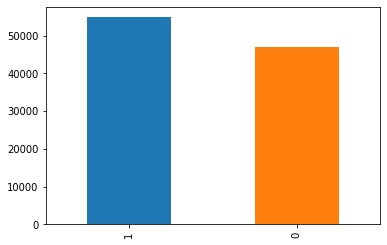

In [643]:
diabetes_data['readmitted'].value_counts().plot(kind='bar', color=discrete_color)

### How is it distributed by race?

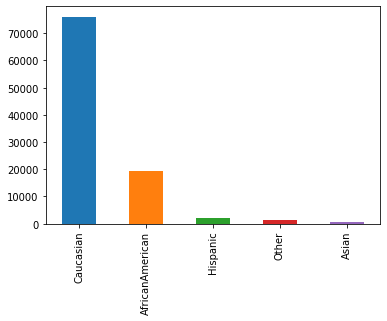

In [644]:
diabetes_data['race'].value_counts().plot(kind='bar', color=discrete_color)

### How is it distributed by gender?

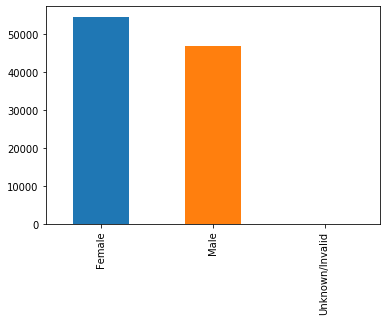

In [645]:
diabetes_data['gender'].value_counts().plot(kind='bar', color=discrete_color)

### How is it distribuited by age?

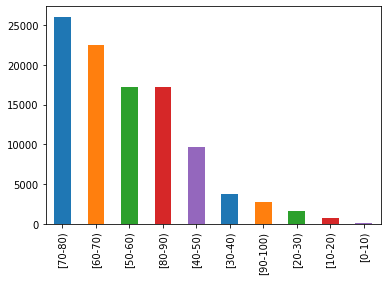

In [646]:
diabetes_data['age'].value_counts().plot(kind='bar', color=discrete_color)

### How are distributed readmitted/no readmitted people by age?

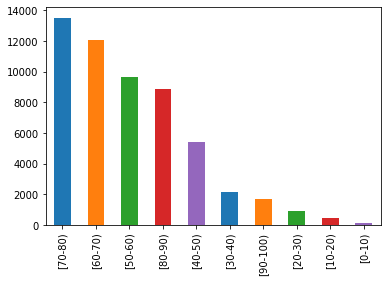

In [647]:
diabetes_data[diabetes_data['readmitted'] == 1]['age'].value_counts().plot(kind='bar', color=discrete_color)

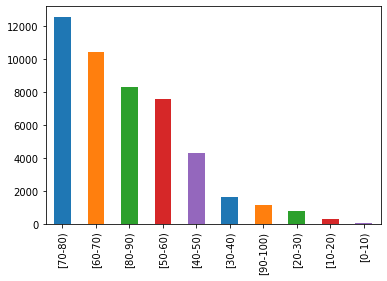

In [648]:
diabetes_data[diabetes_data['readmitted'] == 0]['age'].value_counts().plot(kind='bar', color=discrete_color)

We can see that there is no big difference in the distribucion by people readmitted and no-readmitted.

### What is the distribution by admission type?

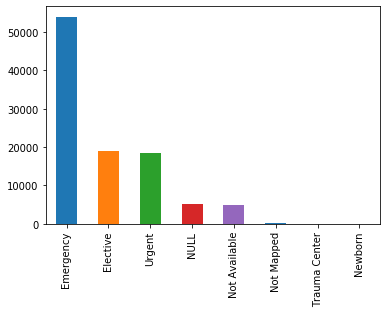

In [649]:
diabetes_data['admission_type_str'].value_counts().plot(kind='bar', color=discrete_color)

### What is the distribution by discharge disposition?

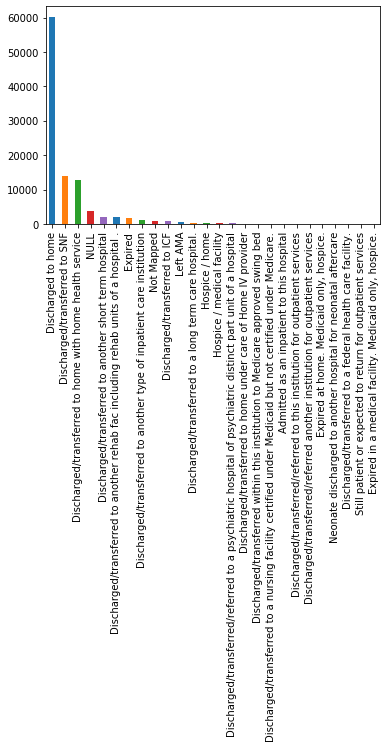

In [650]:
diabetes_data['discharge_disposition_str'].value_counts().plot(kind='bar', color=discrete_color)

Let's resume this information into less categories

In [651]:
discharge_disposition_dict = {1 : 'Discharged to home', 2 : 'Transferred', 3 : 'Transferred',4 : 'Transferred', 5 : 'Transferred', 6 : 'Discharged to home', 7 : 'Discharged to home', 8 : 'Discharged to home', 9 : 'Transferred', 10 : 'Transferred', 11 : 'Dead', 12 : 'Transferred',13 : 'Discharged to home', 14 : 'Transferred', 15 : 'Transferred', 16 : 'Transferred', 17 : 'Transferred',18 : 'Transferred', 19 : 'Dead', 20 : 'Dead', 21 : 'Dead', 22 : 'Transferred', 23 : 'Transferred', 24 : 'Transferred', 25 : 'Other', 26 : 'Transferred', 30 : 'Transferred', 27 : 'Transferred', 28 : 'Transferred', 29 : 'Transferred'}
diabetes_data['discharge_disposition_str'] = diabetes_data['discharge_disposition_id'].replace(discharge_disposition_dict)

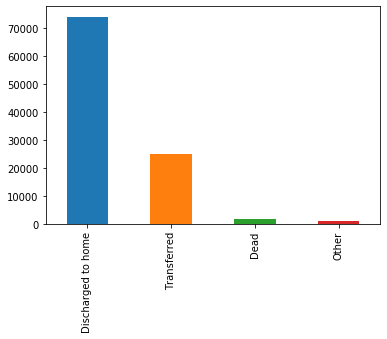

In [652]:
diabetes_data['discharge_disposition_str'].value_counts().plot(kind='bar', color=discrete_color)

### What is the distribution by admission source?

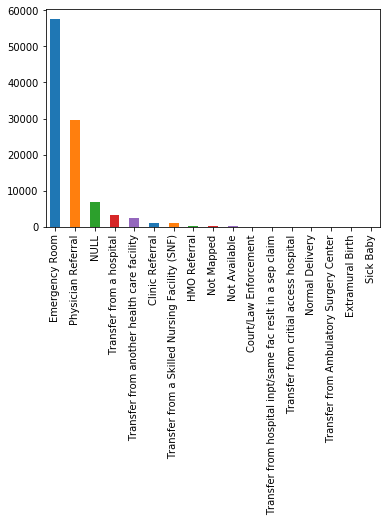

In [653]:
diabetes_data['admission_source_str'].value_counts().plot(kind='bar', color=discrete_color)

Let's resume this information into less categories

In [654]:
admission_source_dict = {1: "Referral", 2: "Referral", 3: "Referral", 4: "Transfer", 5: "Transfer", 6: "Transfer",  7: "Emergency Room", 8: "Null", 9: "Null", 10: "Transfer", 11: "New Born", 12: "New Born", 13: "New Born", 14: "New Born", 15: "Null", 17: "Null",18: "Transfer", 19: "Transfer",  20: "Null", 21: "Null", 22: "Transfer", 23: "New Born", 24: "New Born",  25: "Transfer", 26: "Transfer"}
diabetes_data['admission_source_str'] = diabetes_data['admission_source_id'].replace(admission_source_dict)

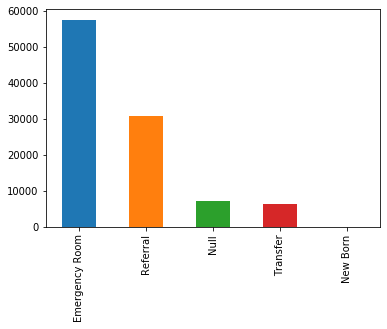

In [655]:
diabetes_data['admission_source_str'].value_counts().plot(kind='bar', color=discrete_color)

### What is the distribution by each medicine?

In [656]:
medicine = ['metformin', 'repaglinide', 'nateglinide', 'chlorpropamide', 
            'glimepiride', 'acetohexamide', 'glipizide', 'glyburide', 
            'tolbutamide', 'pioglitazone', 'rosiglitazone', 'acarbose', 
            'miglitol', 'troglitazone', 'tolazamide', 'examide', 
            'citoglipton', 'insulin', 'glyburide-metformin', 'glipizide-metformin',
            'glimepiride-pioglitazone', 'metformin-rosiglitazone', 'metformin-pioglitazone']

In [657]:
len(medicine)

23

In [658]:
for m in medicine:
    diabetes_data[m + '_flag'] = diabetes_data[m].replace({'No': 0, 'Steady': 1, 'Up': 1, 'Down': 1})

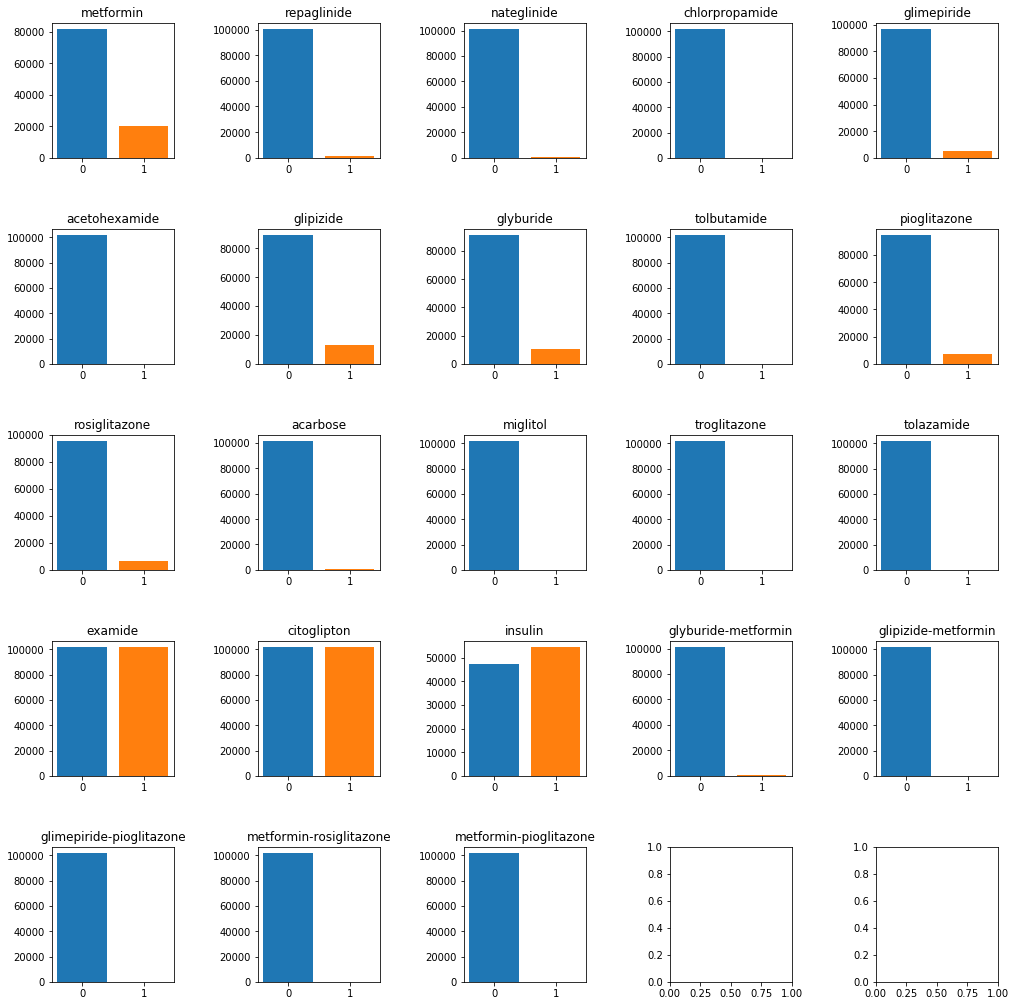

In [659]:
fig, axs = plt.subplots(5, 5, figsize=(15,15))
fig.tight_layout(pad = 5)

for i, m in zip(range(0, 23), medicine):
    medicine_data = diabetes_data.groupby(by=m+'_flag')['patient_nbr'].count().reset_index()
    axs[math.floor(i/5), i%5].bar(['0', '1'], medicine_data['patient_nbr'], color=discrete_color)
    axs[math.floor(i/5), i%5].set_title(m)

## Data Modelling

We're going to drop some columns like:
* encounter_id
* admission_type_id
* discharge_disposition_id
* admission_source_id
* payer_code
* medical_specialty
* diag_1
* diag_2
* diag_3
* medicines

In [660]:
diabetes_data.columns

Index(['encounter_id', 'patient_nbr', 'race', 'gender', 'age', 'weight',
       'admission_type_id', 'discharge_disposition_id', 'admission_source_id',
       'time_in_hospital', 'payer_code', 'medical_specialty',
       'num_lab_procedures', 'num_procedures', 'num_medications',
       'number_outpatient', 'number_emergency', 'number_inpatient', 'diag_1',
       'diag_2', 'diag_3', 'number_diagnoses', 'max_glu_serum', 'A1Cresult',
       'metformin', 'repaglinide', 'nateglinide', 'chlorpropamide',
       'glimepiride', 'acetohexamide', 'glipizide', 'glyburide', 'tolbutamide',
       'pioglitazone', 'rosiglitazone', 'acarbose', 'miglitol', 'troglitazone',
       'tolazamide', 'examide', 'citoglipton', 'insulin',
       'glyburide-metformin', 'glipizide-metformin',
       'glimepiride-pioglitazone', 'metformin-rosiglitazone',
       'metformin-pioglitazone', 'change', 'diabetesMed', 'readmitted',
       'admission_type_str', 'discharge_disposition_str',
       'admission_source_str', 'me

In [661]:
columns_model = ['patient_nbr', 'race', 'gender', 'age', 'weight',
                'admission_type_str', 'discharge_disposition_str', 'admission_source_str',
                'time_in_hospital', 'num_lab_procedures', 'num_procedures' ,
                 'num_medications', 'number_outpatient', 'number_emergency', 'number_inpatient',
                 'number_diagnoses', 'max_glu_serum', 'A1Cresult',
                 'change', 'diabetesMed', 'readmitted']
res_diabetes_data = diabetes_data[columns_model]

We will solve this as a classification process. For this we will need some sklearn libraries like train_test_split and logistictregression.

In [662]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

### Dummy Variables
Also we need to create some dummy variables for string columns.

In [663]:
dummies_list = ['race', 'gender', 'age', 'weight', 'admission_type_str',
                'discharge_disposition_str', 'admission_source_str', 'max_glu_serum',
                'A1Cresult', 'change', 'diabetesMed'
               ]
for d in dummies_list:
    res_diabetes_data = pd.concat([res_diabetes_data, pd.get_dummies(res_diabetes_data[d])], axis=1)
    res_diabetes_data.drop(d, axis = 1, inplace = True)

In [664]:
res_diabetes_data.head()

,patient_nbr,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,number_diagnoses,readmitted,...,None,Norm,>7,>8,None,Norm,Ch,No,No,Yes
0,8222157,1,41,0,1,0,0,0,1,1,...,1,0,0,0,1,0,0,1,1,0
1,55629189,3,59,0,18,0,0,0,9,0,...,1,0,0,0,1,0,1,0,0,1
2,86047875,2,11,5,13,2,0,1,6,1,...,1,0,0,0,1,0,0,1,0,1
3,82442376,2,44,1,16,0,0,0,7,1,...,1,0,0,0,1,0,1,0,0,1
4,42519267,1,51,0,8,0,0,0,5,1,...,1,0,0,0,1,0,1,0,0,1


### Splitting Data

In [665]:
x_train, x_test, y_train, y_test = train_test_split(res_diabetes_data.drop(columns=['readmitted']),
                                                 res_diabetes_data['readmitted'],
                                                 test_size=0.25,
                                                random_state=8)

In [666]:
logisticRegr = LogisticRegression()
logisticRegr.fit(x_train, y_train)

c:\users\hoppe\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

### Prediction

In [667]:
y_pred = logisticRegr.predict(x_test)

### Validation

For this we will use our predicted result against test data.

In [668]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.5428032387390929

### Cross Validation

In [669]:
from sklearn.model_selection import cross_val_score
cross_val_score(pipe, x_train, y_train, cv=10, scoring='accuracy').mean()

c:\users\hoppe\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
c:\users\hoppe\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
c:\users\hoppe\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
c:\users\hoppe\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
c:\users\hoppe\appdata\local\programs\python\python37\lib\si

0.5378910939507122